### classification 

In [48]:
things to do 
# dt, model label

In [3]:
# dataset
# voc segmentation
def collate_fn(batch):
    return tuple(zip(*batch))
from torchvision.transforms import ToTensor
import torchvision, torch
vocdt = torchvision.datasets.VOCSegmentation('/aiv-data/datasets/',transform=ToTensor() )
vocdl = torch.utils.data.DataLoader(vocdt,batch_size=2,collate_fn=collate_fn)

voiter= iter(vocdl)
x,y   = next(voiter)

In [1]:
# voc detection
def collate_fn(batch):
    return tuple(zip(*batch))
from torchvision.transforms import ToTensor
import torchvision, torch
vocdt = torchvision.datasets.VOCDetection('/aiv-data/datasets/',transform=ToTensor() )
vocdl = torch.utils.data.DataLoader(vocdt,batch_size=2,collate_fn=collate_fn)

voiter= iter(vocdl)
x,y   = next(voiter)

In [1]:
# url
import requests as rq
from PIL import Image
import io
url = 'https://images.7news.com.au/publication/C-736288/fc3832987f18c7e8132938d70bdd71c8f5d17673-16x9-x0y285w5472h3078.jpg?imwidth=650&impolicy=sevennews_v2'
img = Image.open(io.BytesIO(rq.get(url).content ))

from torchvision.transforms import functional as vfc 
imt = vfc.pil_to_tensor(img)
imtf = vfc.to_tensor(img)

In [15]:
# model
model = torchvision.models.resnext50_32x4d(pretrained=True)

In [19]:
# inference
pre = model(x[0][None])

/home/yp/anaconda3/envs/torch/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [47]:
# visualization
def get_pre(img,pre,label_list=None):
    pre_int = pre.argmax(dim=1).item()
    # pre_str = label_list[idx]
    # utils.draw bbox
    # attack label
    return img, pre_int, # pre_str
get_pre(x[0],pre)[1]

463

### obj-dtc

In [ ]:
things to do
# attach pre label info

In [1]:
# url
import requests as rq
from PIL import Image
import io
url = 'https://images.7news.com.au/publication/C-736288/fc3832987f18c7e8132938d70bdd71c8f5d17673-16x9-x0y285w5472h3078.jpg?imwidth=650&impolicy=sevennews_v2'
img = Image.open(io.BytesIO(rq.get(url).content ))

from torchvision.transforms import functional as vfc 
imt = vfc.pil_to_tensor(img)
imtf = vfc.to_tensor(img)

In [2]:
import torchvision
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

In [3]:
# inference
model.eval()
pre = model(imtf[None])

/home/yp/anaconda3/envs/torch/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


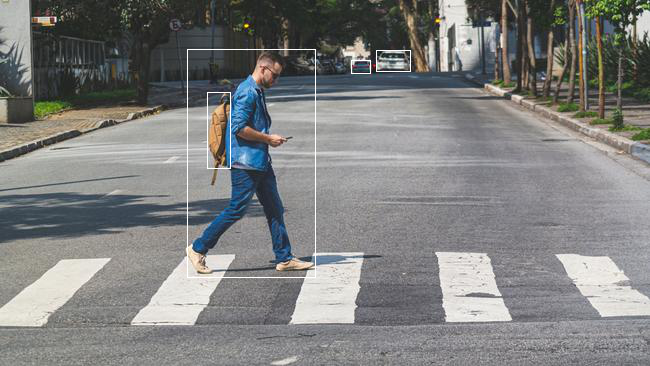

In [4]:
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms import functional as vtf

# nms + cls_threshold
cls_thre = 0.6
idx = torchvision.ops.nms(pre[0]['boxes'],pre[0]['scores'],iou_threshold=0.7)
idx = idx[pre[0]['scores'][idx] > cls_thre]

ann_imt = draw_bounding_boxes(imt,pre[0]['boxes'][idx] )
# tensor to pillow
vtf.to_pil_image(ann_imt)

### IS (Instance Segmentation) 

In [ ]:
# box > segmentation

In [1]:
# url
import requests as rq
from PIL import Image
import io
url = 'https://images.7news.com.au/publication/C-736288/fc3832987f18c7e8132938d70bdd71c8f5d17673-16x9-x0y285w5472h3078.jpg?imwidth=650&impolicy=sevennews_v2'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS92ntDJRyfWtszTT2kJ6nTQiEQRUPWWdaYmg&usqp=CAU'
img = Image.open(io.BytesIO(rq.get(url).content ))

from torchvision.transforms import functional as vfc 
imt = vfc.pil_to_tensor(img)
imtf = vfc.to_tensor(img)

In [2]:
import torchvision
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

In [3]:
model.eval()
pre = model(imtf[None]) # 
# pre[0].keys(): 'boxes', 'labels', 'scores', 'masks'
# boxes: torch.Size([31, 4])
# labels: torch.Size([31])
# scores: torch.Size([31])
# masks: torch.Size([31, 1, 366, 650])

/home/yp/anaconda3/envs/torch/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


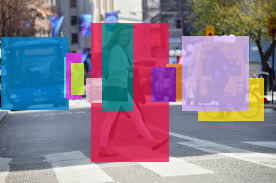

In [5]:
# visualize
from torchvision.utils import draw_bounding_boxes,draw_segmentation_masks
from torchvision.transforms import functional as vtf
import torch 
distinct_rgb = [(230, 25, 75), (60, 180, 75), (255, 225, 25), (0, 130, 200), (245, 130, 48), (145, 30, 180), (70, 240, 240), (240, 50, 230), (210, 245, 60), (250, 190, 212), (0, 128, 128), (220, 190, 255), (170, 110, 40), (255, 250, 200), (128, 0, 0), (170, 255, 195), (128, 128, 0), (255, 215, 180), (0, 0, 128), (128, 128, 128), (255, 255, 255), (0, 0, 0)]
# nms
cls_thre = 0.6
idx = torchvision.ops.nms(pre[0]['boxes'],pre[0]['scores'],iou_threshold=0.7)
idx = idx[pre[0]['scores'][idx] > cls_thre]
# bbox + segmentation
ann_imt = draw_bounding_boxes(imt,pre[0]['boxes'][idx])
ann_imt = draw_segmentation_masks(imt,pre[0]['masks'][idx].squeeze().to(torch.bool),colors=distinct_rgb)

vtf.to_pil_image(ann_imt)

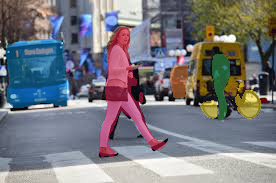

In [11]:
# visualize
from torchvision.utils import draw_bounding_boxes,draw_segmentation_masks
from torchvision.transforms import functional as vtf
import torch 
distinct_rgb = [(230, 25, 75), (60, 180, 75), (255, 225, 25), (0, 130, 200), (245, 130, 48), (145, 30, 180), (70, 240, 240), (240, 50, 230), (210, 245, 60), (250, 190, 212), (0, 128, 128), (220, 190, 255), (170, 110, 40), (255, 250, 200), (128, 0, 0), (170, 255, 195), (128, 128, 0), (255, 215, 180), (0, 0, 128), (128, 128, 128), (255, 255, 255), (0, 0, 0)]

cls_thre = 0.6
masks = pre[0]['masks']>cls_thre
masks = masks.squeeze()
# bbox + segmentation
ann_imt = draw_segmentation_masks(imt,masks[:5],colors=distinct_rgb,alpha=0.5)

vtf.to_pil_image(ann_imt)

### keypoint 

In [20]:
# url
import requests as rq
from PIL import Image
import io
url = 'https://images.7news.com.au/publication/C-736288/fc3832987f18c7e8132938d70bdd71c8f5d17673-16x9-x0y285w5472h3078.jpg?imwidth=650&impolicy=sevennews_v2'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS92ntDJRyfWtszTT2kJ6nTQiEQRUPWWdaYmg&usqp=CAU'
img = Image.open(io.BytesIO(rq.get(url).content ))

from torchvision.transforms import functional as vfc 
imt = vfc.pil_to_tensor(img)
imtf = vfc.to_tensor(img)

In [22]:
import torchvision
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)

In [23]:
model.eval()
pre = model(imtf[None])
# boxes torch.Size([34, 4])
# labels torch.Size([34])
# scores torch.Size([34])
# keypoints torch.Size([34, 17, 3])
# keypoints_scores torch.Size([34, 17])

In [34]:
import torch
torch.unique(pre[0]['keypoints'][:,:,2:] )

tensor([1.], grad_fn=<Unique2Backward>)

### Video Classification 

In [ ]:
# video cls

# generation